In [339]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')


In [340]:
df_raw = pd.read_csv('CarPrice_Assignment.csv')

In [341]:
df=df_raw.copy()

In [342]:
pd.set_option('display.max_columns', None)
df.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [343]:
df.isna().sum()

car_ID              0
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

In [344]:
df=df.drop(['car_ID'], axis=1)

In [345]:
df['symboling'].nunique()

6

In [346]:
df['symboling'].unique()

array([ 3,  1,  2,  0, -1, -2], dtype=int64)

In [347]:
df['CarName'].nunique()

147

In [348]:
df['CarName'].unique()

array(['alfa-romero giulia', 'alfa-romero stelvio',
       'alfa-romero Quadrifoglio', 'audi 100 ls', 'audi 100ls',
       'audi fox', 'audi 5000', 'audi 4000', 'audi 5000s (diesel)',
       'bmw 320i', 'bmw x1', 'bmw x3', 'bmw z4', 'bmw x4', 'bmw x5',
       'chevrolet impala', 'chevrolet monte carlo', 'chevrolet vega 2300',
       'dodge rampage', 'dodge challenger se', 'dodge d200',
       'dodge monaco (sw)', 'dodge colt hardtop', 'dodge colt (sw)',
       'dodge coronet custom', 'dodge dart custom',
       'dodge coronet custom (sw)', 'honda civic', 'honda civic cvcc',
       'honda accord cvcc', 'honda accord lx', 'honda civic 1500 gl',
       'honda accord', 'honda civic 1300', 'honda prelude',
       'honda civic (auto)', 'isuzu MU-X', 'isuzu D-Max ',
       'isuzu D-Max V-Cross', 'jaguar xj', 'jaguar xf', 'jaguar xk',
       'maxda rx3', 'maxda glc deluxe', 'mazda rx2 coupe', 'mazda rx-4',
       'mazda glc deluxe', 'mazda 626', 'mazda glc', 'mazda rx-7 gs',
       'mazda glc 

In [349]:
df=df.drop(['CarName'], axis=1)

In [350]:
df['fueltype'].unique()

array(['gas', 'diesel'], dtype=object)

In [351]:
df["fueltype"].unique()

array(['gas', 'diesel'], dtype=object)

In [352]:
fueltype=pd.get_dummies(df['fueltype'],drop_first=True)
df=pd.concat([df,fueltype],axis=1)

In [353]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   symboling         205 non-null    int64  
 1   fueltype          205 non-null    object 
 2   aspiration        205 non-null    object 
 3   doornumber        205 non-null    object 
 4   carbody           205 non-null    object 
 5   drivewheel        205 non-null    object 
 6   enginelocation    205 non-null    object 
 7   wheelbase         205 non-null    float64
 8   carlength         205 non-null    float64
 9   carwidth          205 non-null    float64
 10  carheight         205 non-null    float64
 11  curbweight        205 non-null    int64  
 12  enginetype        205 non-null    object 
 13  cylindernumber    205 non-null    object 
 14  enginesize        205 non-null    int64  
 15  fuelsystem        205 non-null    object 
 16  boreratio         205 non-null    float64
 1

In [354]:
df=df.drop(['fueltype'], axis=1)

In [355]:
df.head()

,symboling,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,gas
0,3,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0,1
1,3,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0,1
2,1,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0,1
3,2,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0,1
4,2,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0,1


In [356]:
df['aspiration'].unique()

array(['std', 'turbo'], dtype=object)

In [357]:
aspiration=pd.get_dummies(df['aspiration'],drop_first=True) 
df=pd.concat([df,aspiration],axis=1)

In [358]:
df.tail()

,symboling,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,gas,turbo
200,-1,std,four,sedan,rwd,front,109.1,188.8,68.9,55.5,2952,ohc,four,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845.0,1,0
201,-1,turbo,four,sedan,rwd,front,109.1,188.8,68.8,55.5,3049,ohc,four,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045.0,1,1
202,-1,std,four,sedan,rwd,front,109.1,188.8,68.9,55.5,3012,ohcv,six,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485.0,1,0
203,-1,turbo,four,sedan,rwd,front,109.1,188.8,68.9,55.5,3217,ohc,six,145,idi,3.01,3.40,23.0,106,4800,26,27,22470.0,0,1
204,-1,turbo,four,sedan,rwd,front,109.1,188.8,68.9,55.5,3062,ohc,four,141,mpfi,3.78,3.15,9.5,114,5400,19,25,22625.0,1,1


In [359]:
df=df.drop(['aspiration'], axis=1)

In [360]:
df.tail()

,symboling,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,gas,turbo
200,-1,four,sedan,rwd,front,109.1,188.8,68.9,55.5,2952,ohc,four,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845.0,1,0
201,-1,four,sedan,rwd,front,109.1,188.8,68.8,55.5,3049,ohc,four,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045.0,1,1
202,-1,four,sedan,rwd,front,109.1,188.8,68.9,55.5,3012,ohcv,six,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485.0,1,0
203,-1,four,sedan,rwd,front,109.1,188.8,68.9,55.5,3217,ohc,six,145,idi,3.01,3.40,23.0,106,4800,26,27,22470.0,0,1
204,-1,four,sedan,rwd,front,109.1,188.8,68.9,55.5,3062,ohc,four,141,mpfi,3.78,3.15,9.5,114,5400,19,25,22625.0,1,1


In [361]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 24 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   symboling         205 non-null    int64  
 1   doornumber        205 non-null    object 
 2   carbody           205 non-null    object 
 3   drivewheel        205 non-null    object 
 4   enginelocation    205 non-null    object 
 5   wheelbase         205 non-null    float64
 6   carlength         205 non-null    float64
 7   carwidth          205 non-null    float64
 8   carheight         205 non-null    float64
 9   curbweight        205 non-null    int64  
 10  enginetype        205 non-null    object 
 11  cylindernumber    205 non-null    object 
 12  enginesize        205 non-null    int64  
 13  fuelsystem        205 non-null    object 
 14  boreratio         205 non-null    float64
 15  stroke            205 non-null    float64
 16  compressionratio  205 non-null    float64
 1

In [362]:
df['doornumber'].unique()

array(['two', 'four'], dtype=object)

In [363]:
df['doornumber']=df['doornumber'].map({'four':4, 'two':2})

In [364]:
df.head()

,symboling,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,gas,turbo
0,3,2,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0,1,0
1,3,2,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0,1,0
2,1,2,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0,1,0
3,2,4,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0,1,0
4,2,4,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0,1,0


In [365]:
df['carbody'].unique()

array(['convertible', 'hatchback', 'sedan', 'wagon', 'hardtop'],
      dtype=object)

In [366]:
carbody=pd.get_dummies(df['carbody'],drop_first=True)
df=pd.concat([df,carbody],axis=1)
df.head()

,symboling,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,gas,turbo,hardtop,hatchback,sedan,wagon
0,3,2,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0,1,0,0,0,0,0
1,3,2,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0,1,0,0,0,0,0
2,1,2,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0,1,0,0,1,0,0
3,2,4,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0,1,0,0,0,1,0
4,2,4,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0,1,0,0,0,1,0


In [367]:
df=df.drop(['carbody'], axis=1)

In [368]:
df['drivewheel'].unique()

array(['rwd', 'fwd', '4wd'], dtype=object)

In [369]:
drivewheel=pd.get_dummies(df['drivewheel'],drop_first=True)
df=pd.concat([df,drivewheel],axis=1)
df=df.drop(['drivewheel'], axis=1)
df.head()

,symboling,doornumber,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,gas,turbo,hardtop,hatchback,sedan,wagon,fwd,rwd
0,3,2,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0,1,0,0,0,0,0,0,1
1,3,2,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0,1,0,0,0,0,0,0,1
2,1,2,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0,1,0,0,1,0,0,0,1
3,2,4,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0,1,0,0,0,1,0,1,0
4,2,4,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0,1,0,0,0,1,0,0,0


In [370]:
df['enginelocation'].unique()

array(['front', 'rear'], dtype=object)

In [371]:
enginelocation=pd.get_dummies(df['enginelocation'],drop_first=True)
df=pd.concat([df,enginelocation],axis=1)
df=df.drop(['enginelocation'], axis=1)
df.head()

,symboling,doornumber,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,gas,turbo,hardtop,hatchback,sedan,wagon,fwd,rwd,rear
0,3,2,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0,1,0,0,0,0,0,0,1,0
1,3,2,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0,1,0,0,0,0,0,0,1,0
2,1,2,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0,1,0,0,1,0,0,0,1,0
3,2,4,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0,1,0,0,0,1,0,1,0,0
4,2,4,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0,1,0,0,0,1,0,0,0,0


In [372]:
df['enginetype'].unique()

array(['dohc', 'ohcv', 'ohc', 'l', 'rotor', 'ohcf', 'dohcv'], dtype=object)

In [373]:
enginetype=pd.get_dummies(df['enginetype'],drop_first=True)
df=pd.concat([df,enginetype],axis=1)
df=df.drop(['enginetype'], axis=1)
df.head()

,symboling,doornumber,wheelbase,carlength,carwidth,carheight,curbweight,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,gas,turbo,hardtop,hatchback,sedan,wagon,fwd,rwd,rear,dohcv,l,ohc,ohcf,ohcv,rotor
0,3,2,88.6,168.8,64.1,48.8,2548,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0
1,3,2,88.6,168.8,64.1,48.8,2548,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0
2,1,2,94.5,171.2,65.5,52.4,2823,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0,1,0,0,1,0,0,0,1,0,0,0,0,0,1,0
3,2,4,99.8,176.6,66.2,54.3,2337,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0,1,0,0,0,1,0,1,0,0,0,0,1,0,0,0
4,2,4,99.4,176.6,66.4,54.3,2824,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0


In [374]:
df['cylindernumber'].unique()

array(['four', 'six', 'five', 'three', 'twelve', 'two', 'eight'],
      dtype=object)

In [375]:
df['cylindernumber']=df['cylindernumber'].map({'four':4, 'six':6, 'five':5, 'three':3, 'twelve':12, 'two':2, 'eight':8})

In [376]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 33 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   symboling         205 non-null    int64  
 1   doornumber        205 non-null    int64  
 2   wheelbase         205 non-null    float64
 3   carlength         205 non-null    float64
 4   carwidth          205 non-null    float64
 5   carheight         205 non-null    float64
 6   curbweight        205 non-null    int64  
 7   cylindernumber    205 non-null    int64  
 8   enginesize        205 non-null    int64  
 9   fuelsystem        205 non-null    object 
 10  boreratio         205 non-null    float64
 11  stroke            205 non-null    float64
 12  compressionratio  205 non-null    float64
 13  horsepower        205 non-null    int64  
 14  peakrpm           205 non-null    int64  
 15  citympg           205 non-null    int64  
 16  highwaympg        205 non-null    int64  
 1

In [377]:
df['fuelsystem'].unique()

array(['mpfi', '2bbl', 'mfi', '1bbl', 'spfi', '4bbl', 'idi', 'spdi'],
      dtype=object)

In [378]:
fuelsystem=pd.get_dummies(df['fuelsystem'],drop_first=True)
df=pd.concat([df,fuelsystem],axis=1)
df=df.drop(['fuelsystem'], axis=1)
df.head()

,symboling,doornumber,wheelbase,carlength,carwidth,carheight,curbweight,cylindernumber,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,gas,turbo,hardtop,hatchback,sedan,wagon,fwd,rwd,rear,dohcv,l,ohc,ohcf,ohcv,rotor,2bbl,4bbl,idi,mfi,mpfi,spdi,spfi
0,3,2,88.6,168.8,64.1,48.8,2548,4,130,3.47,2.68,9.0,111,5000,21,27,13495.0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0
1,3,2,88.6,168.8,64.1,48.8,2548,4,130,3.47,2.68,9.0,111,5000,21,27,16500.0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0
2,1,2,94.5,171.2,65.5,52.4,2823,6,152,2.68,3.47,9.0,154,5000,19,26,16500.0,1,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0
3,2,4,99.8,176.6,66.2,54.3,2337,4,109,3.19,3.40,10.0,102,5500,24,30,13950.0,1,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0
4,2,4,99.4,176.6,66.4,54.3,2824,5,136,3.19,3.40,8.0,115,5500,18,22,17450.0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0


In [379]:
df.size

7995

In [380]:
df.shape

(205, 39)

In [381]:
df1=df.copy()

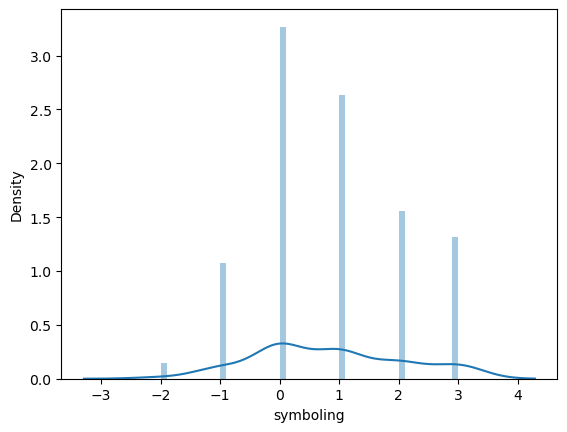

In [382]:
sns.distplot(df['symboling'],bins=50)
plt.show()

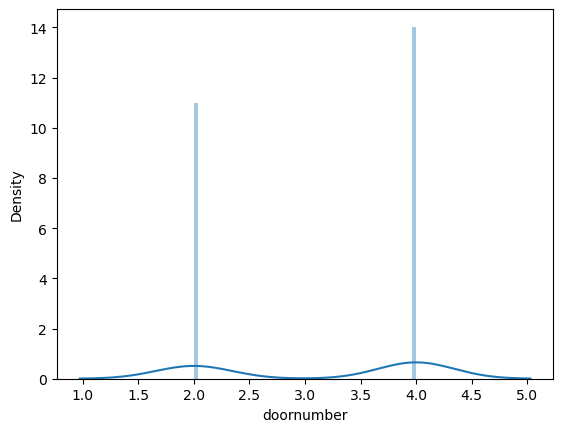

In [383]:
sns.distplot(df['doornumber'],bins=50)
plt.show()

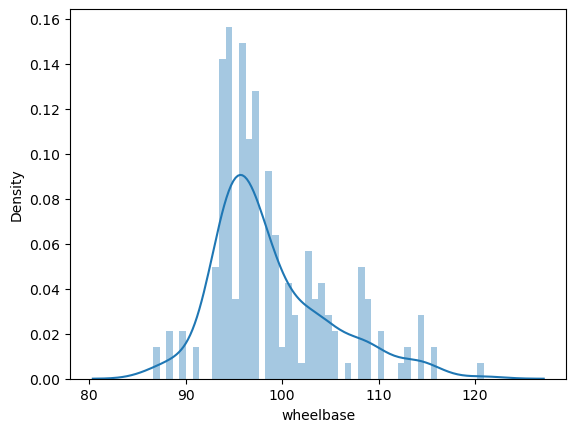

In [384]:
sns.distplot(df['wheelbase'],bins=50)
plt.show()

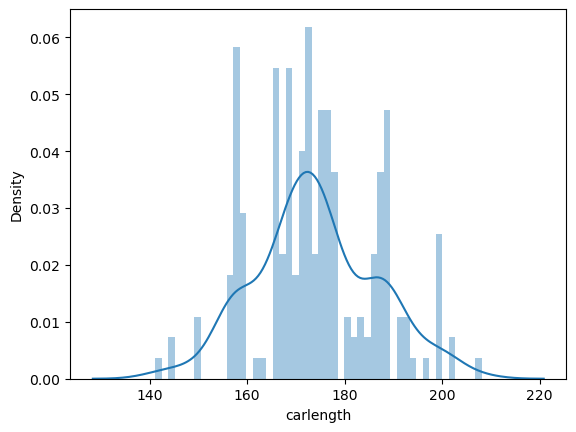

In [385]:
sns.distplot(df['carlength'],bins=50)
plt.show()

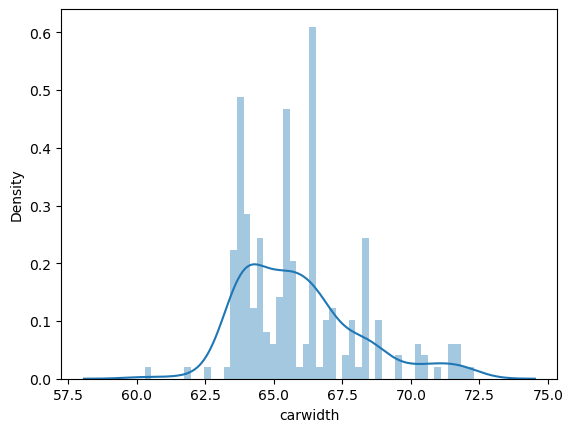

In [386]:
sns.distplot(df['carwidth'],bins=50)
plt.show()

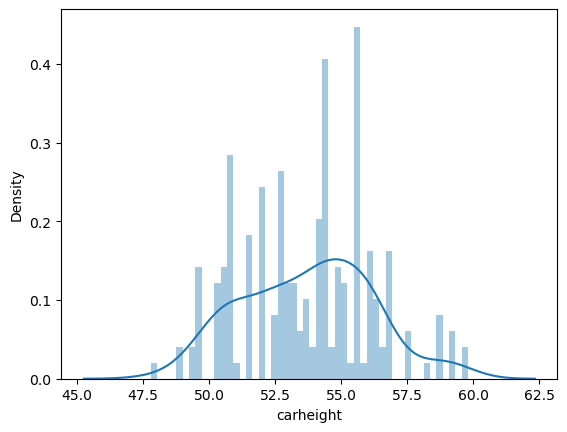

In [387]:
sns.distplot(df['carheight'],bins=50)
plt.show()

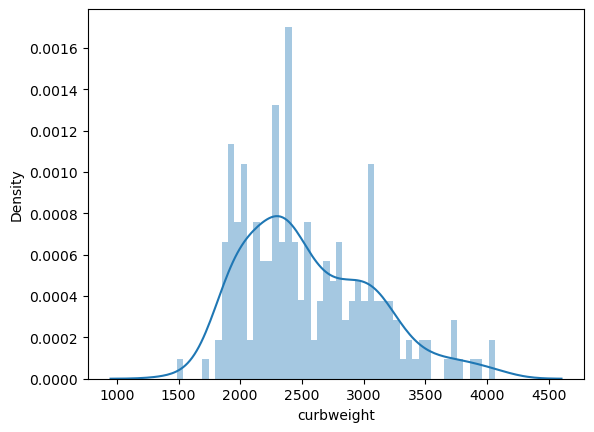

In [388]:
sns.distplot(df['curbweight'],bins=50)
plt.show()

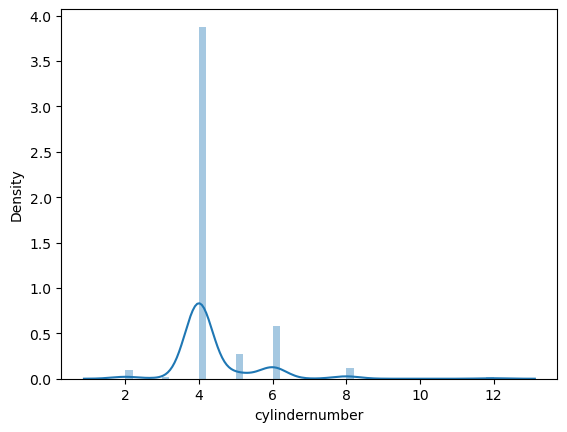

In [389]:
sns.distplot(df['cylindernumber'],bins=50)
plt.show()

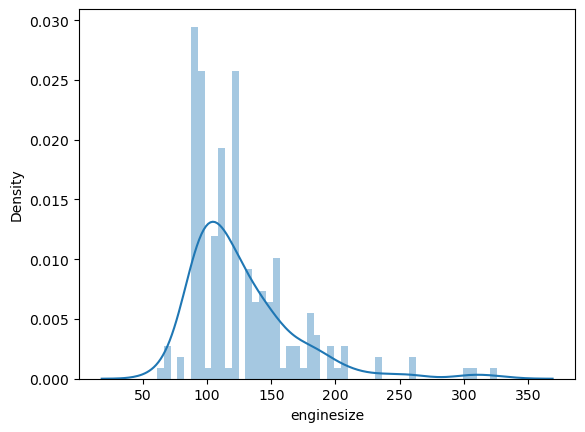

In [390]:
sns.distplot(df['enginesize'],bins=50)
plt.show()

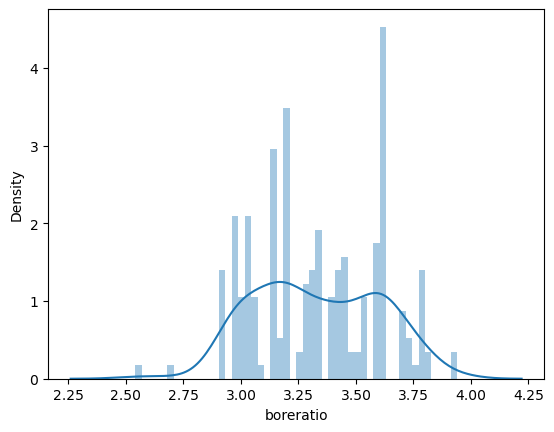

In [391]:
sns.distplot(df['boreratio'],bins=50)
plt.show()

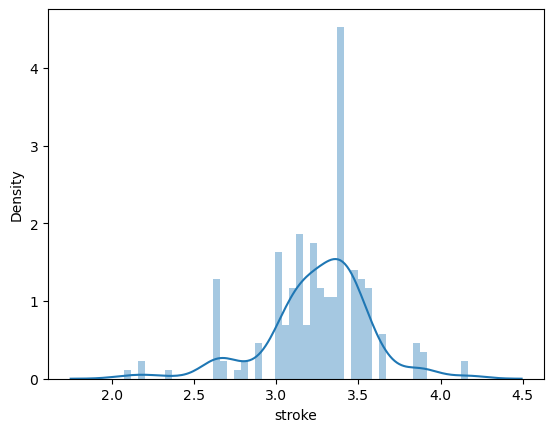

In [392]:
sns.distplot(df['stroke'],bins=50)
plt.show()

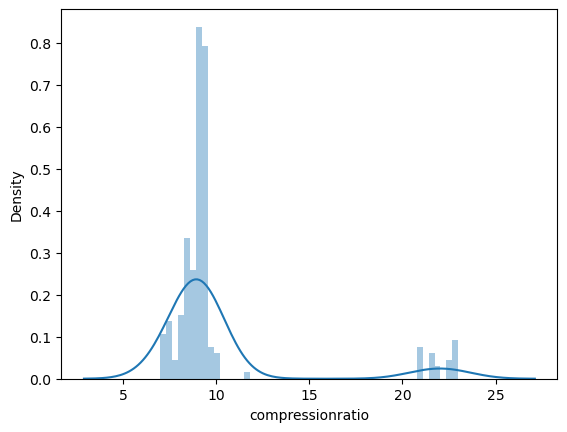

In [393]:
sns.distplot(df['compressionratio'],bins=50)
plt.show()

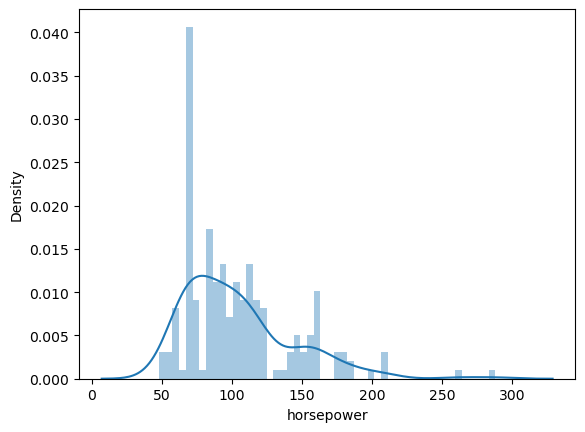

In [394]:
sns.distplot(df['horsepower'],bins=50)
plt.show()

In [395]:
df.columns

Index(['symboling', 'doornumber', 'wheelbase', 'carlength', 'carwidth',
       'carheight', 'curbweight', 'cylindernumber', 'enginesize', 'boreratio',
       'stroke', 'compressionratio', 'horsepower', 'peakrpm', 'citympg',
       'highwaympg', 'price', 'gas', 'turbo', 'hardtop', 'hatchback', 'sedan',
       'wagon', 'fwd', 'rwd', 'rear', 'dohcv', 'l', 'ohc', 'ohcf', 'ohcv',
       'rotor', '2bbl', '4bbl', 'idi', 'mfi', 'mpfi', 'spdi', 'spfi'],
      dtype='object')

In [396]:
lst=[ 'peakrpm', 'citympg', 'highwaympg', 'price']

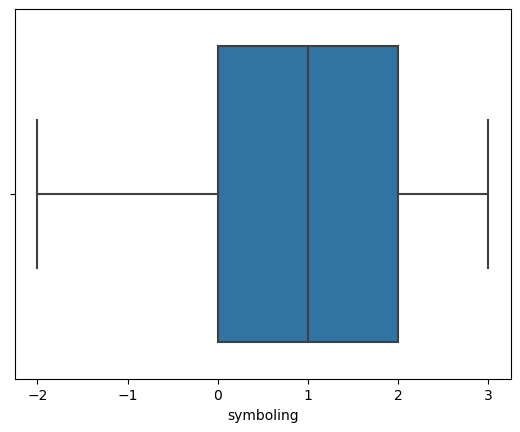

In [397]:
sns.boxplot(df['symboling'])
plt.show()

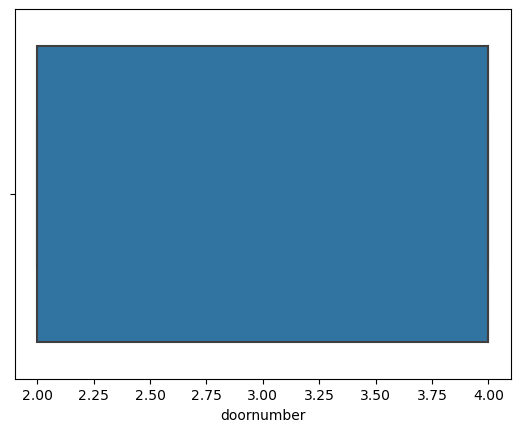

In [398]:
sns.boxplot(df['doornumber'])
plt.show()

In [399]:
list=['wheelbase', 'carlength', 'carwidth',
       'carheight', 'curbweight', 'cylindernumber', 'enginesize', 'boreratio',
       'stroke', 'compressionratio', 'horsepower', 'peakrpm', 'citympg',
       'highwaympg', 'price']

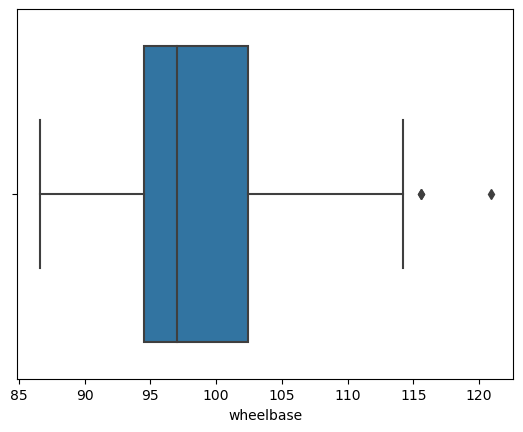

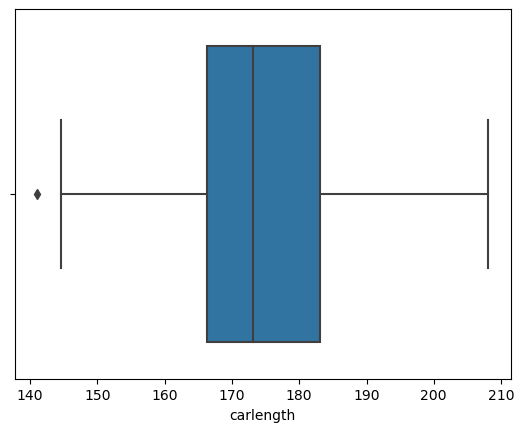

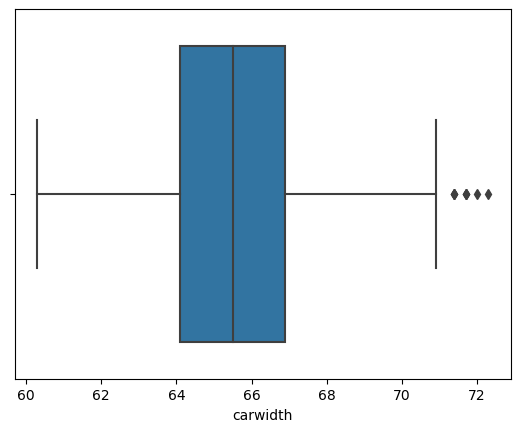

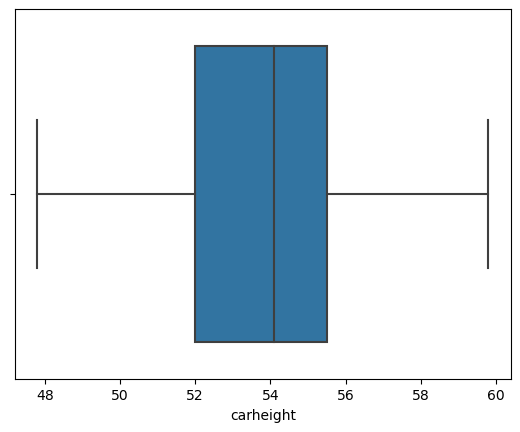

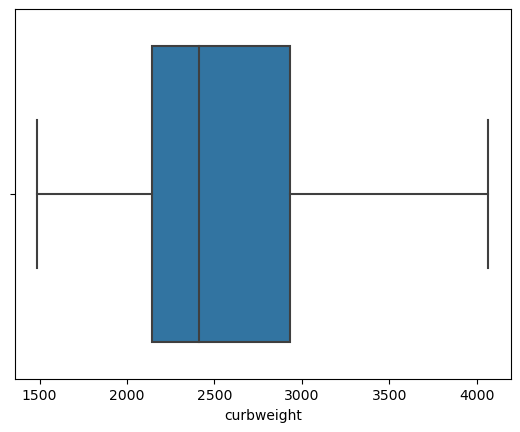

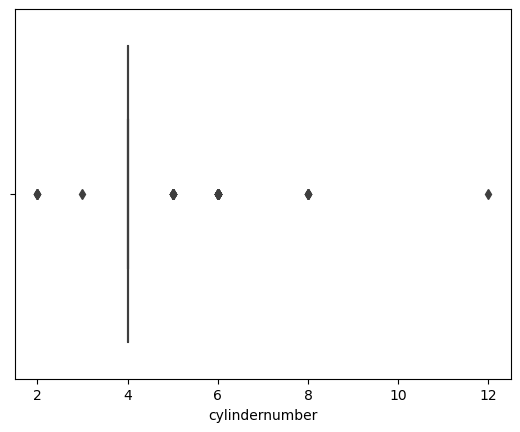

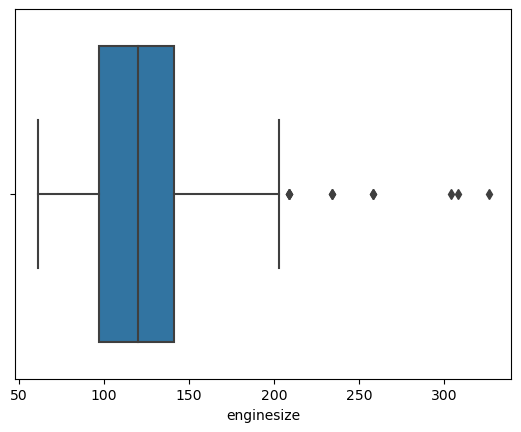

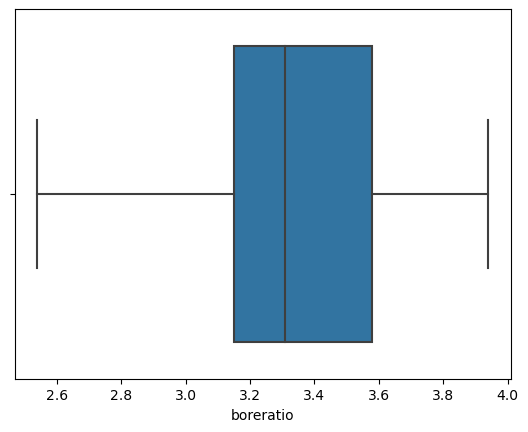

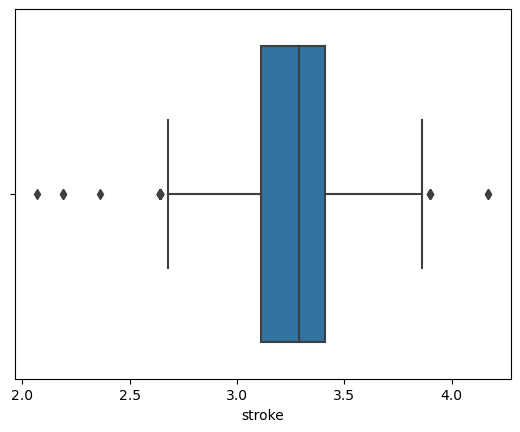

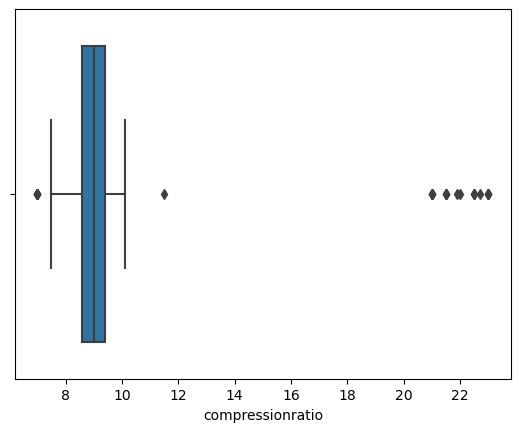

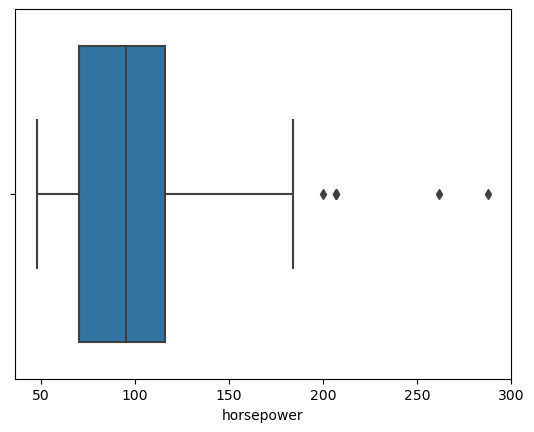

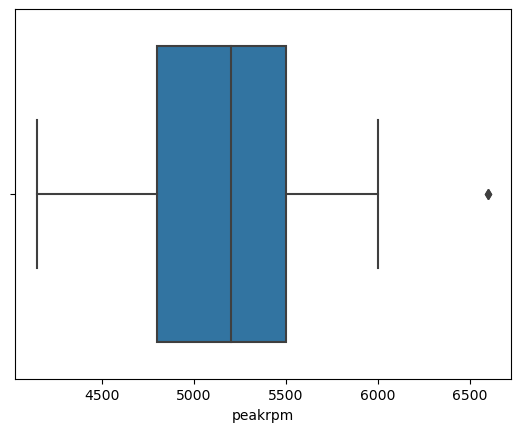

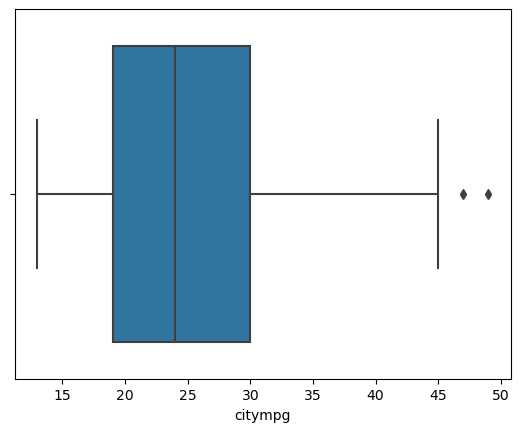

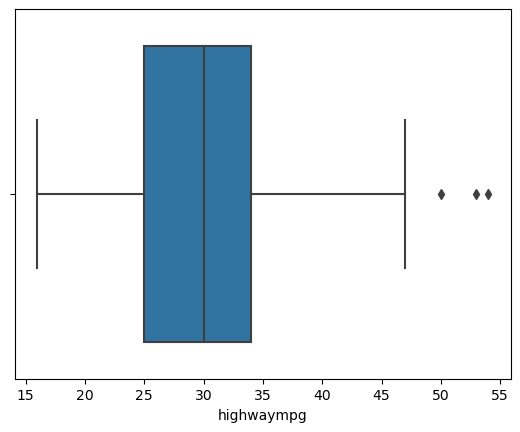

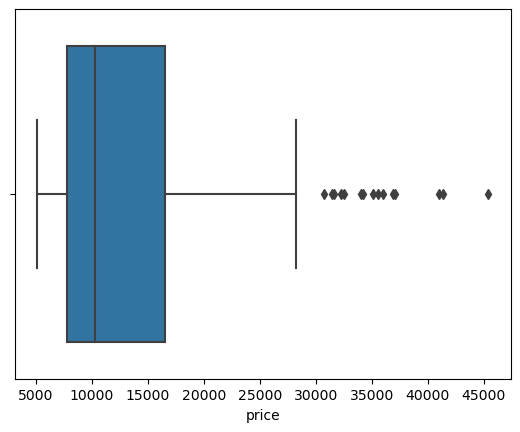

In [400]:
for i in list:
    sns.boxplot(df[i])
    plt.show()

In [401]:
df.corr()

,symboling,doornumber,wheelbase,carlength,carwidth,carheight,curbweight,cylindernumber,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,gas,turbo,hardtop,hatchback,sedan,wagon,fwd,rwd,rear,dohcv,l,ohc,ohcf,ohcv,rotor,2bbl,4bbl,idi,mfi,mpfi,spdi,spfi
symboling,1.000000,-0.664073,-0.531954,-0.357612,-0.232919,-0.541038,-0.227691,-0.113129,-0.105790,-0.130051,-0.008735,-0.178515,0.070873,0.273606,-0.035823,0.034606,-0.079978,0.194311,-0.059866,0.168845,0.435648,-0.378341,-0.298243,0.102839,-0.076381,0.212471,0.009347,-0.133979,-0.082855,0.037513,-0.013597,0.245950,-0.034069,0.212471,-0.194311,0.122067,0.012532,0.181939,0.065707
doornumber,-0.664073,1.000000,0.447357,0.398568,0.207168,0.552208,0.197379,-0.016009,0.020742,0.119258,-0.011082,0.177888,-0.126947,-0.247668,-0.012417,-0.036330,0.031835,-0.191491,0.031792,-0.227793,-0.606688,0.515046,0.329690,0.033578,-0.073958,-0.137757,-0.079143,0.178718,0.021404,0.022095,-0.052138,-0.159463,0.020525,-0.137757,0.191491,-0.079143,0.025019,-0.146272,-0.079143
wheelbase,-0.531954,0.447357,1.000000,0.874587,0.795144,0.589435,0.776386,0.339507,0.569329,0.488750,0.160959,0.249786,0.353294,-0.360469,-0.470414,-0.544082,0.577816,-0.308346,0.257611,-0.008608,-0.386094,0.291086,0.210899,-0.460355,0.498830,-0.187790,-0.004156,0.399603,-0.204037,-0.183195,0.166152,-0.081174,-0.396505,-0.070124,0.308346,-0.033294,0.348891,-0.117359,-0.032129
carlength,-0.357612,0.398568,0.874587,1.000000,0.841118,0.491029,0.877728,0.430672,0.683360,0.606454,0.129533,0.158414,0.552623,-0.287242,-0.670909,-0.704662,0.682920,-0.212679,0.234539,0.047292,-0.436269,0.269647,0.219683,-0.508714,0.538370,-0.050989,0.009391,0.261715,-0.274413,-0.118320,0.244053,-0.057877,-0.487237,-0.049998,0.212679,-0.004831,0.511374,-0.079790,-0.008245
carwidth,-0.232919,0.207168,0.795144,0.841118,1.000000,0.279210,0.867032,0.545007,0.735433,0.559150,0.182942,0.181129,0.640732,-0.220012,-0.642704,-0.677218,0.759325,-0.233880,0.300567,0.066360,-0.222308,0.154637,0.060639,-0.472116,0.511149,-0.051698,0.209136,0.210771,-0.286211,-0.124446,0.348869,-0.013699,-0.522594,-0.011834,0.233880,0.012832,0.461896,-0.046399,-0.023158
carheight,-0.541038,0.552208,0.589435,0.491029,0.279210,1.000000,0.295572,-0.013995,0.067149,0.171071,-0.055307,0.261214,-0.108802,-0.320411,-0.048640,-0.107358,0.119336,-0.284631,0.087311,-0.072328,-0.477476,0.235863,0.459148,-0.100273,0.039814,-0.106234,-0.092628,0.319687,0.036260,-0.046670,-0.065063,-0.238720,-0.079418,-0.206225,0.284631,-0.101245,0.108685,-0.278615,-0.066778
curbweight,-0.227691,0.197379,0.776386,0.877728,0.867032,0.295572,1.000000,0.609727,0.850594,0.648480,0.168790,0.151362,0.750739,-0.266243,-0.757414,-0.797465,0.835305,-0.217275,0.324902,0.098956,-0.287501,0.099425,0.164075,-0.666039,0.669987,0.050468,0.109243,0.250124,-0.413293,-0.080295,0.400878,-0.039196,-0.577159,-0.040801,0.217275,0.034431,0.520220,-0.002434,0.024052
cylindernumber,-0.113129,-0.016009,0.339507,0.430672,0.545007,-0.013995,0.609727,1.000000,0.846031,0.231399,0.008210,-0.020002,0.692016,-0.124172,-0.445837,-0.466666,0.718305,0.024544,-0.047972,0.139149,-0.177782,0.113090,-0.048559,-0.327460,0.347350,0.183048,0.235034,-0.107265,-0.316184,0.005085,0.650738,-0.311453,-0.252848,-0.269058,-0.024544,-0.024707,0.392551,-0.075619,-0.024707
enginesize,-0.105790,0.020742,0.569329,0.683360,0.735433,0.067149,0.850594,0.846031,1.000000,0.583774,0.203129,0.028971,0.809769,-0.244660,-0.653658,-0.677470,0.874145,-0.069594,0.108217,0.239363,-0.216805,0.088459,-0.027518,-0.518391,0.565509,0.196826,0.128248,0.016063,-0.363334,-0.016508,0.562403,-0.184762,-0.442562,-0.166946,0.069594,0.049033,0.483520,0.004490,-0.013327
boreratio,-0.130051,0.119258,0.488750,0.606454,0.559150,0.171071,0.648480,0.231399,0.583774,1.000000,-0.055909,0.005197,0.573677,-0.254976,-0.584532,-0.587012,0.553173,-0.054451,0.212614,0.208089,-0.227032,0.030517,0.105719,-0.583087,0.574105,0.185042,0.158136,0.181729,-0.410383,0.326798,0.11950

<AxesSubplot:>

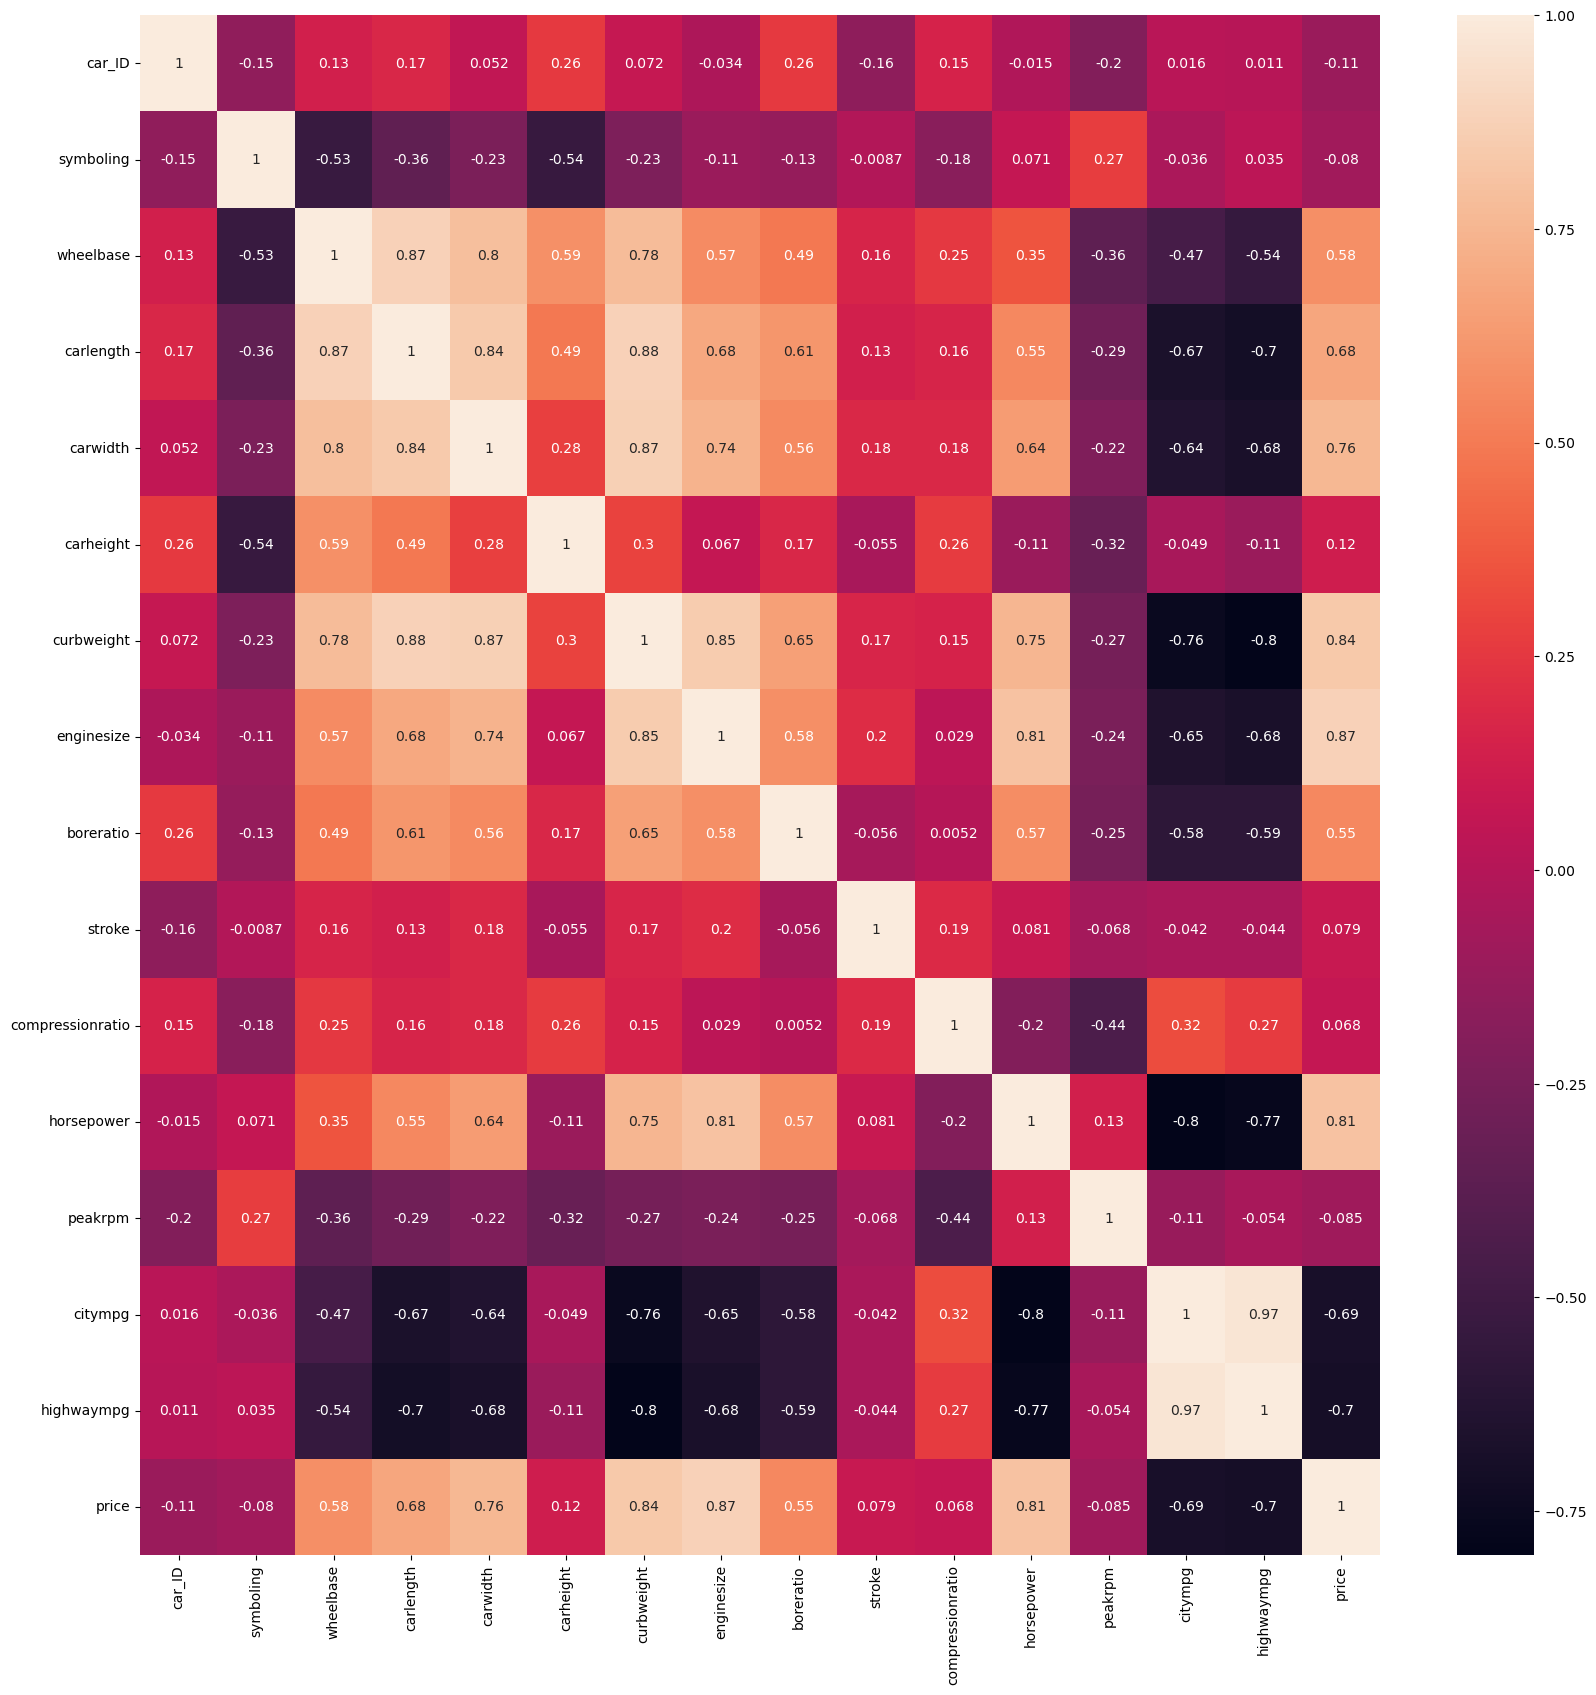

In [402]:
plt.figure(figsize=(20,20))
sns.heatmap(df_raw.corr(),annot=True)

## Outliers

In [403]:
from scipy import stats

In [404]:
df_new=df[(np.abs(stats.zscore(df))<3).all(axis=1)]

In [405]:
df.shape

(205, 39)

In [406]:
df_new.shape

(123, 39)

In [407]:
from sklearn.model_selection import train_test_split


In [408]:
X=df.drop(['price'],axis=1)
y=df['price']



In [409]:
X.head()

,symboling,doornumber,wheelbase,carlength,carwidth,carheight,curbweight,cylindernumber,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,gas,turbo,hardtop,hatchback,sedan,wagon,fwd,rwd,rear,dohcv,l,ohc,ohcf,ohcv,rotor,2bbl,4bbl,idi,mfi,mpfi,spdi,spfi
0,3,2,88.6,168.8,64.1,48.8,2548,4,130,3.47,2.68,9.0,111,5000,21,27,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0
1,3,2,88.6,168.8,64.1,48.8,2548,4,130,3.47,2.68,9.0,111,5000,21,27,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0
2,1,2,94.5,171.2,65.5,52.4,2823,6,152,2.68,3.47,9.0,154,5000,19,26,1,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0
3,2,4,99.8,176.6,66.2,54.3,2337,4,109,3.19,3.40,10.0,102,5500,24,30,1,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0
4,2,4,99.4,176.6,66.4,54.3,2824,5,136,3.19,3.40,8.0,115,5500,18,22,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0


In [410]:
y.head()

0    13495.0
1    16500.0
2    16500.0
3    13950.0
4    17450.0
Name: price, dtype: float64

In [411]:
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.2, random_state=42)


# Scaling

In [412]:
from sklearn.preprocessing import StandardScaler


In [413]:
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)


# Model

# Linear Regression

In [414]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score


In [415]:
M1=LinearRegression()
M1.fit(X_train,y_train)


LinearRegression()

In [416]:
P1=M1.predict(X_test)


In [417]:
P1[0]


27166.573720661

In [418]:
print('mean_squared_error:',np.sqrt(mean_squared_error(y_test,P1)))
print('\n')
print('mean_absolute_error:',mean_absolute_error(y_test,P1))
print('\n')
print('mean_squared_error:',mean_squared_error(y_test,P1))
print('\n')
print('R2_Score',r2_score(y_test,P1))


mean_squared_error: 3698.213395367901


mean_absolute_error: 2342.4644485588155


mean_squared_error: 13676782.317678576


R2_Score 0.826753411274459


# Linear Regression 2

In [419]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

In [420]:
M2=make_pipeline(PolynomialFeatures(degree=2),LinearRegression())
M2.fit(X_train,y_train)
P2=M2.predict(X_test)
print('mean_squared_error:',np.sqrt(mean_squared_error(y_test,P2)))
print('\n')
print('mean_absolute_error:',mean_absolute_error(y_test,P2))
print('\n')
print('mean_squared_error:',mean_squared_error(y_test,P2))
print('\n')
print('R2_Score',r2_score(y_test,P2))


mean_squared_error: 96431809876.52943


mean_absolute_error: 40871954466.17966


mean_squared_error: 9.29909395606312e+21


R2_Score -117793518146720.53


In [421]:
M3=make_pipeline(PolynomialFeatures(degree=3),LinearRegression())
M3.fit(X_train,y_train)
P3=M3.predict(X_test)
print('mean_squared_error:',np.sqrt(mean_squared_error(y_test,P3)))
print('\n')
print('mean_absolute_error:',mean_absolute_error(y_test,P3))
print('\n')
print('mean_squared_error:',mean_squared_error(y_test,P3))
print('\n')
print('R2_Score',r2_score(y_test,P3))


mean_squared_error: 7525664810045.811


mean_absolute_error: 2423549124234.6216


mean_squared_error: 5.663563083316184e+25


R2_Score -7.174150771911813e+17


# Ridge Regression(L2)

In [422]:
from sklearn.linear_model import Ridge


In [423]:
M4=Ridge()
M4.fit(X_train,y_train)
P4=M4.predict(X_test)
print('mean_squared_error:',np.sqrt(mean_squared_error(y_test,P4)))
print('\n')
print('mean_absolute_error:',mean_absolute_error(y_test,P4))
print('\n')
print('mean_squared_error:',mean_squared_error(y_test,P4))
print('\n')
print('R2_Score',r2_score(y_test,P4))

mean_squared_error: 3735.033452838187


mean_absolute_error: 2344.07045681496


mean_squared_error: 13950474.893820347


R2_Score 0.8232864916383413


Ridge Regression(L2) dig 2


In [424]:
M5=make_pipeline(PolynomialFeatures(degree=2),Ridge())
M5.fit(X_train,y_train)
P5=M5.predict(X_test)
print('mean_squared_error:',np.sqrt(mean_squared_error(y_test,P5)))
print('\n')
print('mean_absolute_error:',mean_absolute_error(y_test,P5))
print('\n')
print('mean_squared_error:',mean_squared_error(y_test,P5))
print('\n')
print('R2_Score',r2_score(y_test,P5))


mean_squared_error: 3506.835715115858


mean_absolute_error: 2523.615823591728


mean_squared_error: 12297896.732812151


R2_Score 0.8442200359725903


Ridge Regression(L2) dig 3


In [425]:
M6=make_pipeline(PolynomialFeatures(degree=3),Ridge())
M6.fit(X_train,y_train)
P6=M6.predict(X_test)
print('mean_squared_error:',np.sqrt(mean_squared_error(y_test,P6)))
print('\n')
print('mean_absolute_error:',mean_absolute_error(y_test,P6))
print('\n')
print('mean_squared_error:',mean_squared_error(y_test,P6))
print('\n')
print('R2_Score',r2_score(y_test,P6))


mean_squared_error: 3584.9393480836475


mean_absolute_error: 2352.161822530757


mean_squared_error: 12851790.129438406


R2_Score 0.8372037554429906


Lasso (L1)

In [426]:
from sklearn.linear_model import Lasso


In [427]:
M7=Lasso()
M7.fit(X_train,y_train)
P7=M7.predict(X_test)
print('mean_squared_error:',np.sqrt(mean_squared_error(y_test,P7)))
print('\n')
print('mean_absolute_error:',mean_absolute_error(y_test,P7))
print('\n')
print('mean_squared_error:',mean_squared_error(y_test,P7))
print('\n')
print('R2_Score',r2_score(y_test,P7))


mean_squared_error: 3694.9394540236053


mean_absolute_error: 2340.507212066639


mean_squared_error: 13652577.56890026


R2_Score 0.8270600177597711


Lasso (L1) dig2

In [428]:
M8=make_pipeline(PolynomialFeatures(degree=2),Lasso())
M8.fit(X_train,y_train)
P8=M8.predict(X_test)
print('mean_squared_error:',np.sqrt(mean_squared_error(y_test,P8)))
print('\n')
print('mean_absolute_error:',mean_absolute_error(y_test,P8))
print('\n')
print('mean_squared_error:',mean_squared_error(y_test,P8))
print('\n')
print('R2_Score',r2_score(y_test,P8))


mean_squared_error: 8092.19759169449


mean_absolute_error: 3613.9503122255755


mean_squared_error: 65483661.863026105


R2_Score 0.17050511066760266


SGDRegressor

In [429]:
from sklearn.linear_model import SGDRegressor

In [430]:
M13=SGDRegressor()
M13.fit(X_train,y_train)
P13=M13.predict(X_test)
print('mean_squared_error:',np.sqrt(mean_squared_error(y_test,P13)))
print('\n')
print('mean_absolute_error:',mean_absolute_error(y_test,P13))
print('\n')
print('mean_squared_error:',mean_squared_error(y_test,P13))
print('\n')
print('R2_Score',r2_score(y_test,P13))


mean_squared_error: 3796.425805212188


mean_absolute_error: 2409.1803511537273


mean_squared_error: 14412848.89448101


R2_Score 0.8174295059476135


Decision Tree Regressor


In [431]:
from sklearn.tree import DecisionTreeRegressor


In [432]:
M9=DecisionTreeRegressor()
M9.fit(X_train,y_train)
P9=M9.predict(X_test)
print('mean_squared_error:',np.sqrt(mean_squared_error(y_test,P9)))
print('\n')
print('mean_absolute_error:',mean_absolute_error(y_test,P9))
print('\n')
print('mean_squared_error:',mean_squared_error(y_test,P9))
print('\n')
print('R2_Score',r2_score(y_test,P9))


mean_squared_error: 2862.095445272738


mean_absolute_error: 1891.9430975609757


mean_squared_error: 8191590.337850952


R2_Score 0.8962354558765354


Random Forest Regressor


In [433]:
from sklearn.ensemble import RandomForestRegressor

In [434]:
M10=RandomForestRegressor()
M10.fit(X_train,y_train)
P10=M10.predict(X_test)
print('mean_squared_error:',np.sqrt(mean_squared_error(y_test,P10)))
print('\n')
print('mean_absolute_error:',mean_absolute_error(y_test,P10))
print('\n')
print('mean_squared_error:',mean_squared_error(y_test,P10))
print('\n')
print('R2_Score',r2_score(y_test,P10))

mean_squared_error: 1800.3819281086514


mean_absolute_error: 1258.9705609756097


mean_squared_error: 3241375.087060225


R2_Score 0.958940841232278


KNN Regressor

In [435]:
from sklearn.neighbors import KNeighborsRegressor

Text(0, 0.5, 'Error Rate')

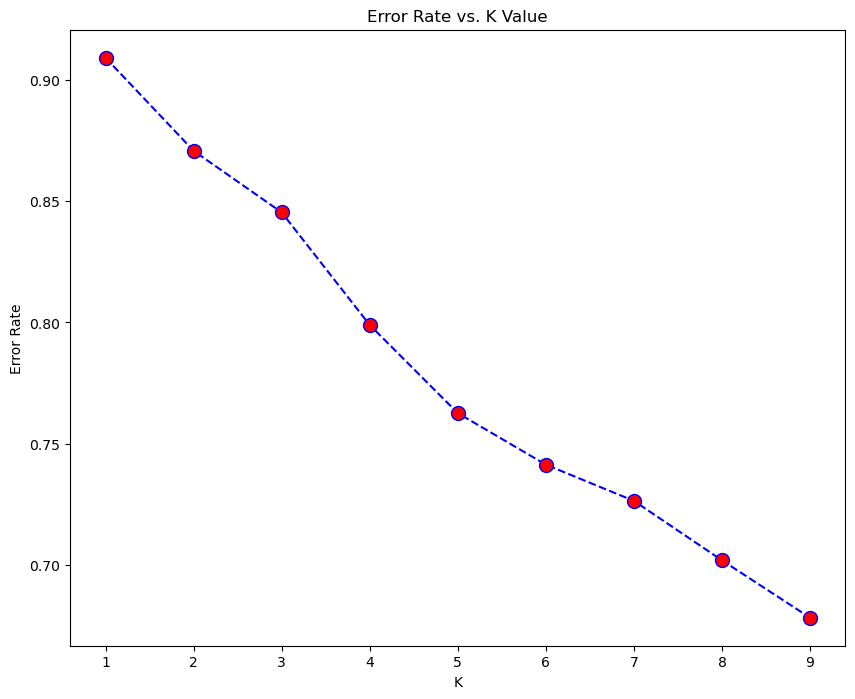

In [436]:
error_Mat=[]
for i in range (1,10):
    knn=KNeighborsRegressor(n_neighbors=i)
    knn.fit(X_train,y_train)
    predict_i=knn.predict(X_test)
    error_Mat.append(r2_score(y_test,predict_i))
plt.figure(figsize=(10,8))
plt.plot(range(1,10),error_Mat,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

In [438]:
M11=KNeighborsRegressor(n_neighbors=3)
M11.fit(X_train,y_train)
P11=M11.predict(X_test)
print('mean_squared_error:',np.sqrt(mean_squared_error(y_test,P11)))
print('\n')
print('mean_absolute_error:',mean_absolute_error(y_test,P11))
print('\n')
print('mean_squared_error:',mean_squared_error(y_test,P11))
print('\n')
print('R2_Score',r2_score(y_test,P11))

mean_squared_error: 3494.4909591397554


mean_absolute_error: 2191.536593495935


mean_squared_error: 12211467.063509487


R2_Score 0.8453148582066189



Support Vector Machine

In [439]:
from sklearn.svm import SVR

In [440]:
M15=SVR()
M15.fit(X_train,y_train)
P15=M15.predict(X_test)
print('mean_squared_error:',np.sqrt(mean_squared_error(y_test,P15)))
print('\n')
print('mean_absolute_error:',mean_absolute_error(y_test,P15))
print('\n')
print('mean_squared_error:',mean_squared_error(y_test,P15))
print('\n')
print('R2_Score',r2_score(y_test,P15))

mean_squared_error: 9318.527672517821


mean_absolute_error: 5697.842781090021


mean_squared_error: 86834957.9834804


R2_Score -0.09995610833975221


GradientBoostingRegressor


In [441]:
from sklearn.ensemble import GradientBoostingRegressor

In [442]:
M16=GradientBoostingRegressor()
M16.fit(X_train,y_train)
P16=M16.predict(X_test)
print('mean_squared_error:',np.sqrt(mean_squared_error(y_test,P16)))
print('\n')
print('mean_absolute_error:',mean_absolute_error(y_test,P16))
print('\n')
print('mean_squared_error:',mean_squared_error(y_test,P16))
print('\n')
print('R2_Score',r2_score(y_test,P16))

mean_squared_error: 2403.7098414234288


mean_absolute_error: 1712.275210319221


mean_squared_error: 5777821.001755845


R2_Score 0.9268111639440869


AdaBoostRegressor

In [443]:
from sklearn.ensemble import AdaBoostRegressor

In [444]:
M17=AdaBoostRegressor()
M17.fit(X_train,y_train)
P17=M17.predict(X_test)
print('mean_squared_error:',np.sqrt(mean_squared_error(y_test,P17)))
print('\n')
print('mean_absolute_error:',mean_absolute_error(y_test,P17))
print('\n')
print('mean_squared_error:',mean_squared_error(y_test,P17))
print('\n')
print('R2_Score',r2_score(y_test,P17))

mean_squared_error: 2761.4645357196405


mean_absolute_error: 2138.991594141236


mean_squared_error: 7625686.382037289


R2_Score 0.9034038766069201



ALL AT ONE PLACE

In [445]:
Name=['Linear Regression','Linear Regression digree 2','Linear Regression digree 3','Ridge Regression',
      'Ridge Regression digree 2','Ridge Regression digree 3','Lasso','Lasso digree 2',
     'Decision Tree Regressor','Random Forest Regressor','KNN Regressor','SGDRegressor','SVR',' GradientBoostingRegressor','AdaBoostRegressor']
clfs= [M1,M2,M3,M4,M5,M6,M7,M8,M9,M10,M11,M13,M15,M16,M17]

In [446]:
results=[]
for i in clfs:
    i.fit(X_train,y_train)
    r2=r2_score(y_test, i.predict(X_test))
    results.append(r2)

In [447]:
score= pd.DataFrame(results,index=Name)
score.columns=['R2']
score.sort_values(by='R2',ascending=False)

,R2
Random Forest Regressor,9.584286e-01
GradientBoostingRegressor,9.281257e-01
AdaBoostRegressor,9.148310e-01
Decision Tree Regressor,9.122563e-01
KNN Regressor,8.453149e-01
Ridge Regression digree 2,8.442200e-01
Ridge Regression digree 3,8.372038e-01
Lasso,8.270600e-01
Linear Regression,8.267534e-01
Ridge Regression,8.232865e-01


In [455]:
feature_imp = pd.DataFrame(M10.feature_importances_ ,index=df.columns[0:38])
feature_imp.sort_values(by=0,ascending=False).head()

,0
enginesize,0.581239
curbweight,0.259007
highwaympg,0.049269
horsepower,0.035354
carwidth,0.014667


<AxesSubplot:>

<Figure size 1000x800 with 0 Axes>

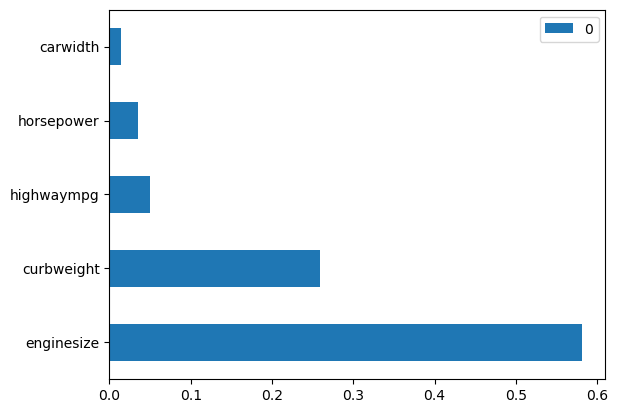

In [456]:
plt.figure(figsize=(10,8))
feature_imp.sort_values(by=0,ascending=False).head().plot(kind='barh')